In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
print(df.columns)
print(len(df.columns))

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')
31


# Convert to Pytorch Tensor

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
type(df.values)

numpy.ndarray

In [10]:
data = torch.from_numpy(df.values).float()
data.shape

torch.Size([569, 31])

In [14]:
x = data[:, :10] # columns을 앞 10개까지만 씀
y = data[:, -1:] # target

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [15]:
# ratio of train / valid / test 
ratios = [.6, .2, .2]

In [19]:
data.size()[0]

569

In [20]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print("Train {} / Valid {} / Test {} samples." .format(train_cnt, valid_cnt, test_cnt))

Train 341 / Valid 113 / Test 115 samples.


In [23]:
 torch.randperm(data.size()[0])

tensor([288, 350, 154, 265, 327,  78, 446,   6,  84, 472, 492, 484, 341, 431,
        282, 309, 478, 414, 277, 127, 349,  70, 304, 163, 276, 522,  27,  40,
        378, 249, 257, 108, 279,  62, 454, 517,  13,  94, 172, 104, 207, 450,
        230,  36, 430, 544, 373, 110,  45, 175, 165, 555, 488, 203, 248, 261,
         48, 141, 481, 111, 447, 278,  44, 252, 204, 318,  77, 229, 211, 310,
        272, 383, 253, 377, 529,  35, 459, 109, 167, 222, 531, 168,  87, 102,
        469, 559,  65, 323,   2, 399, 564, 457, 145, 487, 247, 567, 314, 418,
        563, 100, 395, 192, 134, 437, 343, 194, 268, 436, 264, 368,  64,  60,
        473,  19, 388, 494, 461, 435,  41, 530, 289, 184, 507, 409, 423, 113,
        214, 283, 465, 536, 164, 243, 372, 219, 356, 123, 503, 411, 311, 417,
        477, 476, 516, 183, 535, 116, 344, 202, 380,  93, 521, 558,  18, 126,
        148, 462, 348, 177, 195, 392, 258,   8, 281, 193, 298, 292, 143, 369,
        216, 197, 241, 353, 153, 534, 490, 466, 365, 458, 387, 4

In [25]:
indices = torch.randperm(data.size()[0]) # 0~568 까지로 섞인 인덱스

x = torch.index_select(x, dim=0, index=indices) # indices로 데이터 순서를 섞어 줌. |x| = (569, 10)로 크기 변화 없음
y = torch.index_select(y, dim=0, index=indices) # |y| = (569, 1)

x = x.split(cnts, dim=0) # 데이터를 쪼개 줌
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([341, 10]) torch.Size([341, 1])
torch.Size([113, 10]) torch.Size([113, 1])
torch.Size([115, 10]) torch.Size([115, 1])


# Set Hyper Prameters

In [51]:
n_epochs = 10000
batch_size = 128 # DataLoader 전에 지정 되어 있어야 함
print_interval = 10
early_stop = 100

# Get DataLoaders

In [33]:
from torch.utils.data import Dataset, DataLoader

In [34]:
class CustomDataset(Dataset): #Dataset 상속
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
        super().__init__()
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [36]:
train_loader = DataLoader(
    dataset=CustomDataset(x[0], y[0]),
    batch_size=batch_size,
    shuffle=True, # Train loader는 반.드.시 shuffle 해줘야 함. 
)

valid_loader = DataLoader(
    dataset=CustomDataset(x[1], y[1]),
    batch_size=batch_size,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=CustomDataset(x[2], y[2]),
    batch_size=batch_size,
    shuffle=False,
)

print("Train {} / Valid {} / Test {} samples." .format(
    len(train_loader.dataset), 
    len(valid_loader.dataset),
    len(test_loader.dataset)
))

Train 341 / Valid 113 / Test 115 samples.


# Build Model & Optimizer

In [40]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y[0].size(-1)),
    nn.Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=10, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
  (9): Sigmoid()
)

In [41]:
optimizer = optim.Adam(model.parameters())

# Train

In [42]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

lowest_epoch = np.inf

In [52]:
train_history, valid_history = [], []

for i in range(n_epochs):
    model.train()
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in train_loader:
        y_hat_i = model(x_i)
        loss =  F.binary_cross_entropy(y_hat_i, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        train_loss += float(loss) # This is very important to prevent memory Leak.
        
    train_loss = train_loss / len(train_loader)
    
    model.eval()
    with torch.no_grad():
        valid_loss = 0
        
        for x_i, y_i in valid_loader:
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            
            valid_loss += float(loss)
            
            y_hat += [y_hat_i]
            
    valid_loss = valid_loss / len(valid_loader)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
    
    if (i + 1) % print_interval == 0:
        print("Epoch {}: train loss = {:4} valid_loss = {:4} lowest_loss = {:4}" .format(i + 1, train_loss, valid_loss, lowest_loss))
        

    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i+1:
            print("There is no improvement during last {} epochs." .format(early_stop))
            break

print("The best validation loss from epoch %d : %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

Epoch 10: train loss = 0.6652554670969645 valid_loss = 0.6699602007865906 lowest_loss = 0.6690933704376221
Epoch 20: train loss = 0.6613967617352804 valid_loss = 0.6697984933853149 lowest_loss = 0.6690933704376221
Epoch 30: train loss = 0.6591612497965494 valid_loss = 0.6700937747955322 lowest_loss = 0.6690933704376221
Epoch 40: train loss = 0.6592979828516642 valid_loss = 0.6705842018127441 lowest_loss = 0.6690933704376221
Epoch 50: train loss = 0.6639411846796671 valid_loss = 0.6717718243598938 lowest_loss = 0.6690933704376221
Epoch 60: train loss = 0.6611254016558329 valid_loss = 0.6721336841583252 lowest_loss = 0.6690933704376221
Epoch 70: train loss = 0.6579106052716573 valid_loss = 0.6719958782196045 lowest_loss = 0.6690933704376221
Epoch 80: train loss = 0.6616525848706564 valid_loss = 0.6727471947669983 lowest_loss = 0.6690933704376221
Epoch 90: train loss = 0.6588274041811625 valid_loss = 0.6720983386039734 lowest_loss = 0.6690933704376221
Epoch 100: train loss = 0.66121625900

<All keys matched successfully>

# Loss History

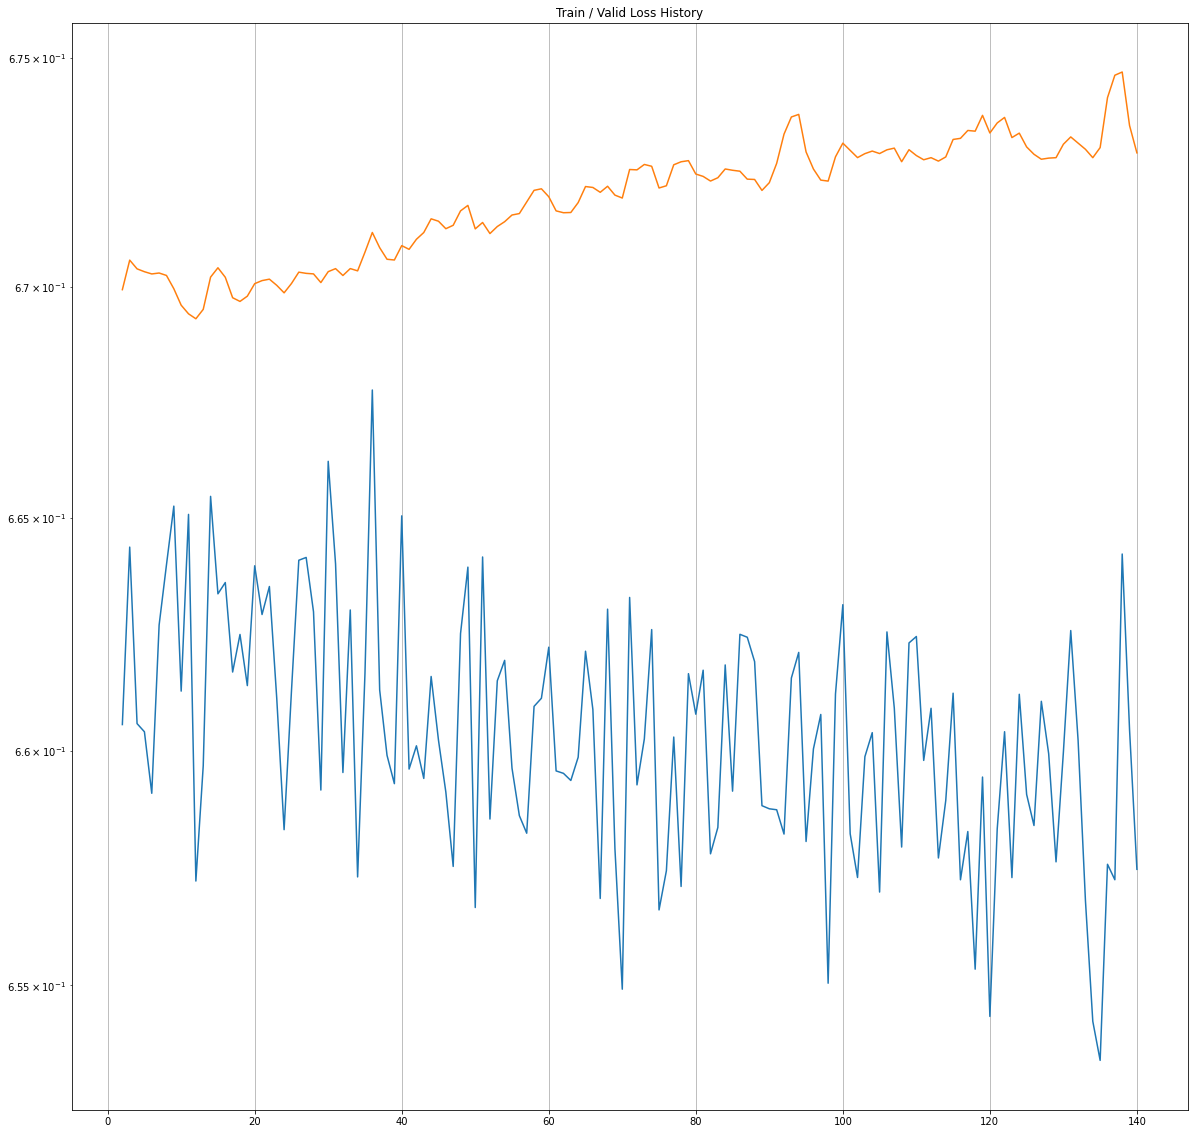

In [54]:
plot_from = 2

plt.figure(figsize=(20, 20))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)

plt.yscale('log')
plt.show()

# Let's see the result 

In [55]:
test_loss = 0
y_hat = []

model.eval()
with torch.no_grad():
    for x_i, y_i in test_loader:
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)
        
        test_loss += loss
        
        y_hat += [y_hat_i]
        
test_loss = test_loss / len(test_loader)
y_hat = torch.cat(y_hat, dim=0)

print("Test loss: %.4e" % test_loss)

Test loss: 6.4945e-01


In [56]:
correct_cnt = (y[2] == (y_hat > .5)).sum()
total_cnt = float(y[2].size(0))

print("Test Accuracy: %.4f" % (correct_cnt / total_cnt))

Test Accuracy: 0.6522
